In [ ]:
import pandas as pd
import yfinance as yf

data = yf.download('BTC-USD', start = '2021-03-01', end = '2024-03-03')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,45159.503906,49784.015625,45115.093750,49631.242188,49631.242188,53891300112
2021-03-02,49612.105469,50127.511719,47228.843750,48378.988281,48378.988281,47530897720
2021-03-03,48415.816406,52535.136719,48274.320312,50538.242188,50538.242188,53220811975
2021-03-04,50522.304688,51735.089844,47656.929688,48561.167969,48561.167969,52343816680
2021-03-05,48527.031250,49396.429688,46542.515625,48927.304688,48927.304688,48625928883
...,...,...,...,...,...,...
2024-02-27,54519.363281,57537.839844,54484.199219,57085.371094,57085.371094,49756832031
2024-02-28,57071.097656,63913.132812,56738.425781,62504.789062,62504.789062,83239156760
2024-02-29,62499.183594,63585.644531,60498.730469,61198.382812,61198.382812,65496611844


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib


--2024-03-14 14:20:28--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-03-14 14:20:28--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-03-14 14:20:28--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving phoenixna

In [ ]:
import talib as ta
from talib import abstract

data.rename(columns = {'Open': 'open',
                       'High': 'high',
                       'Low': 'low',
                       'Close': 'close',
                       'Volume': 'volume'}, inplace = True)

data['RSI'] = abstract.RSI(data)
data['SMA'] = abstract.SMA(data)
data['AD'] = abstract.AD(data)


In [ ]:
X = data[['RSI', 'SMA', 'AD', 'close']]
X.dropna(inplace = True)
X

<ipython-input-5-3d7d12e3b9c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace = True)


,RSI,SMA,AD,close
Date,,,,
2021-03-30,62.630704,54867.314583,3.726208e+11,58917.691406
2021-03-31,62.632994,55176.900911,3.780090e+11,58918.832031
2021-04-01,63.011805,55534.128255,3.837303e+11,59095.808594
2021-04-02,63.658586,55828.997266,3.682767e+11,59384.312500
2021-04-03,57.030924,56130.421354,3.086354e+11,57603.890625
...,...,...,...,...
2024-02-27,81.390956,48383.344792,1.140696e+12,57085.371094
2024-02-28,87.297033,49023.896224,1.191256e+12,62504.789062
2024-02-29,80.651953,49632.088672,1.155450e+12,61198.382812


In [ ]:
y = X['close']

In [ ]:
X.drop('close', axis= 1, inplace= True)
X

<ipython-input-7-1773bdece658>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('close', axis= 1, inplace= True)


,RSI,SMA,AD
Date,,,
2021-03-30,62.630704,54867.314583,3.726208e+11
2021-03-31,62.632994,55176.900911,3.780090e+11
2021-04-01,63.011805,55534.128255,3.837303e+11
2021-04-02,63.658586,55828.997266,3.682767e+11
2021-04-03,57.030924,56130.421354,3.086354e+11
...,...,...,...
2024-02-27,81.390956,48383.344792,1.140696e+12
2024-02-28,87.297033,49023.896224,1.191256e+12
2024-02-29,80.651953,49632.088672,1.155450e+12


In [ ]:
percent_for_train = 0.7
split = int(percent_for_train * len(data))

In [ ]:
X_train = X[:split]
y_train = y[:split]

x_test = X[split:]
y_test = y[split:]

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

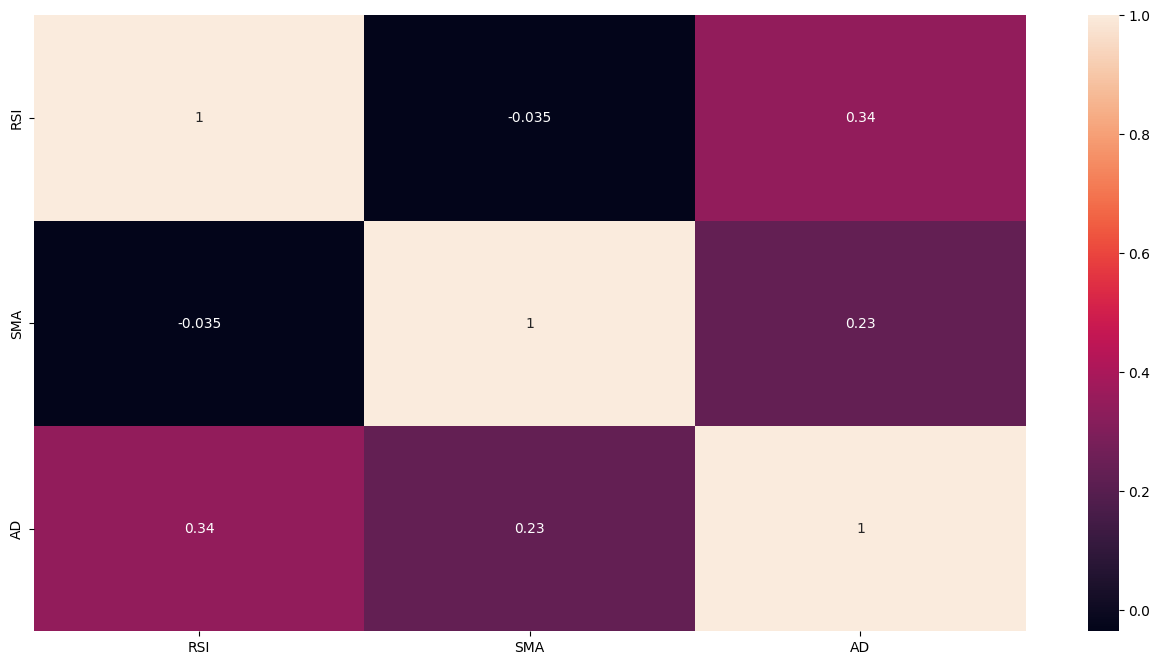

In [ ]:
corr_DF = X.corr(method = 'pearson')

plt.figure(figsize = (16,8))
sns.heatmap(corr_DF,annot=True)
plt.show()

In [ ]:
clf = LinearRegression()
score = cross_val_score(clf, X, y, cv=4, scoring='r2')
print(score)
print(np.mean(score))

[0.79255368 0.9875602  0.7809129  0.95138478]
0.8781028895274742


In [ ]:
variance = np.var(score)
variance

0.008528925266881085

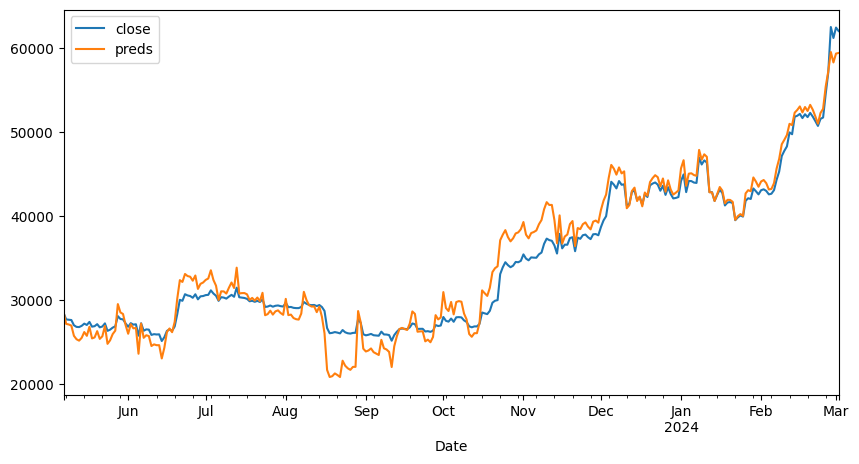

In [ ]:
clf = LinearRegression()
clf.fit(X_train, y_train)

preds = clf.predict(x_test)

final = pd.DataFrame()
final['close'] = y_test
final['preds'] = preds

plt.figure(figsize=(10,5))
final['close'].plot()
final['preds'].plot()
plt.legend()
plt.show()

In [ ]:
data['RSI'] = abstract.RSI(data)
data['AROONOSC'] = abstract.AROONOSC(data)
data['CCI'] = abstract.CCI(data)

X = data[['RSI', 'AROONOSC', 'CCI', 'close']]
X.dropna(inplace = True)
X

<ipython-input-22-5449ee758131>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace = True)


,RSI,AROONOSC,CCI,close
Date,,,,
2021-03-15,62.869907,85.714286,68.693189,55907.199219
2021-03-16,64.285968,57.142857,34.811766,56804.902344
2021-03-17,67.370224,57.142857,58.778061,58870.894531
2021-03-18,64.434890,57.142857,51.413860,57858.921875
2021-03-19,65.221388,57.142857,62.859741,58346.652344
...,...,...,...,...
2024-02-27,81.390956,100.000000,352.578322,57085.371094
2024-02-28,87.297033,100.000000,308.886432,62504.789062
2024-02-29,80.651953,35.714286,206.401046,61198.382812


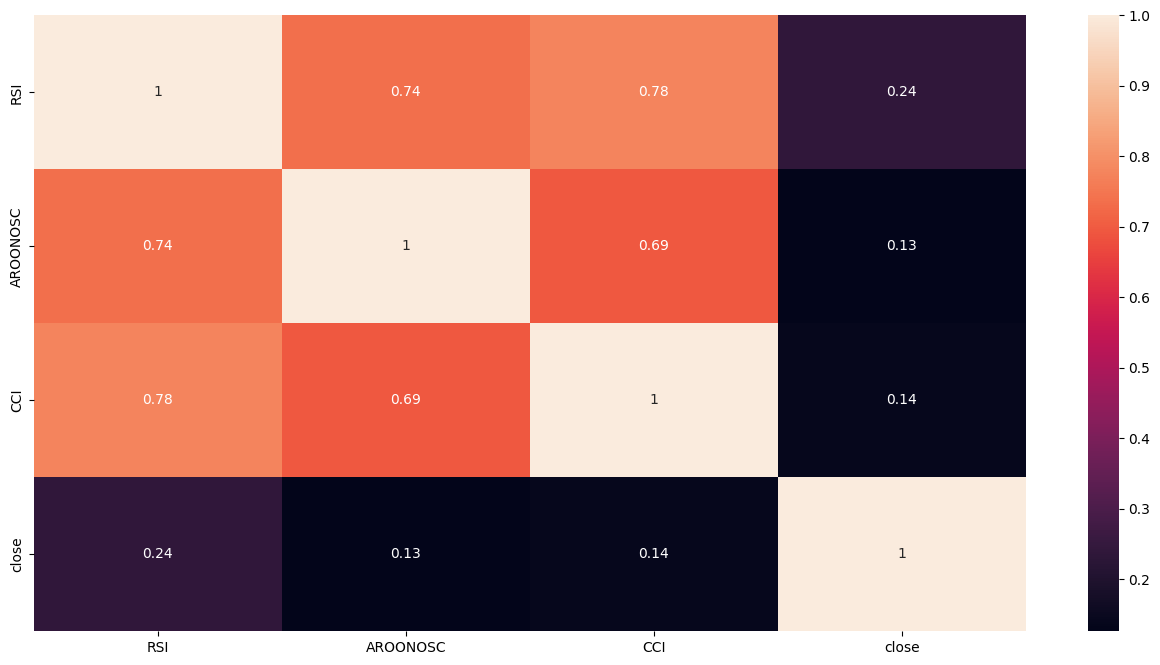

In [ ]:
corr_DF = X.corr(method = 'pearson')

plt.figure(figsize = (16,8))
sns.heatmap(corr_DF,annot=True)
plt.show()

In [2]:
clf = LinearRegression()
score = cross_val_score(clf, X, y, cv=4, scoring='r2')
print(score)
print(np.mean(score))

NameError: name 'LinearRegression' is not defined